<a href="https://colab.research.google.com/github/moharamfatema/graduation-project/blob/main/data-preprocessing/UBI_splitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install npy_append_array

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [3]:
from tqdm import tqdm
import numpy as np
from npy_append_array import NpyAppendArray as npaa
import gc

In [4]:
ROOT = '/gdrive/MyDrive/Datasets/UBI_FIGHTS/extracted'
shape_x, shape_y = (299354, 28, 28, 28), (299354, 1)

In [5]:
dtype = np.float32
mode = 'r'
xmap = np.memmap(ROOT+'/x.npy',dtype=dtype, shape=shape_x, mode=mode)

In [6]:
def perm_to_file(arr, perm:np.ndarray, filename:str,batch_size=1e4):
    with npaa(filename) as x:
        start = 0
        loop_end = int(max(len(perm),batch_size))
        loop_start = int(min(len(perm),batch_size))
        loop = [i for i in range(loop_start, loop_end,int(batch_size))]
        loop.append(len(perm))
        print(loop)
        for i in tqdm(loop):
            end = min(i, perm.shape[0])
            x.append(arr[start:end])
            # print(start,end)
            start = end
        

## Unbalanced data

In [7]:
# splitting 70 10 20
np.random.seed(123)
y = np.load(ROOT+'/y.npy')

y_viol = np.argwhere(y == 1)
y_norm = np.argwhere(y == 0)

perm_viol  = np.random.permutation(y_viol.shape[0])
train_ratio_viol = len(perm_viol) // 10 * 7
val_ratio_viol   = train_ratio_viol + len(perm_viol) // 10 * 1

print(train_ratio_viol, val_ratio_viol)

perm_norm  = np.random.permutation(y_norm.shape[0])
train_ratio_norm = len(perm_norm) // 10 * 7
val_ratio_norm   = train_ratio_norm + len(perm_norm) // 10 

print(train_ratio_norm, val_ratio_norm)



4774 5456
204771 234024


In [ ]:
len(perm_norm)

292531

<ipython-input-14-220c8adb0cc7>:2: RuntimeWarning: overflow encountered in multiply
  plt.imshow(xmap[8,5]*255.,cmap='gray')


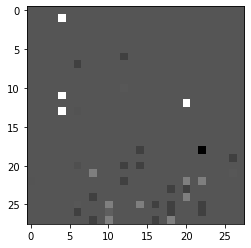

In [14]:
import matplotlib.pyplot as plt
plt.imshow(xmap[8,5]*255.,cmap='gray')

In [8]:
train_perm = np.concatenate((perm_viol[:train_ratio_viol], perm_norm[:train_ratio_norm]))
val_perm   = np.concatenate((perm_viol[train_ratio_viol:val_ratio_viol], perm_norm[train_ratio_norm:val_ratio_norm]))
test_perm  = np.concatenate((perm_viol[val_ratio_viol:], perm_norm[val_ratio_norm:]))

np.random.shuffle(train_perm)
np.random.shuffle(val_perm)
np.random.shuffle(test_perm)

In [10]:
# perm_to_file(xmap, val_perm,ROOT+'/x_val.npy',batch_size=5e4)
# perm_to_file(xmap, test_perm,ROOT+'/x_test.npy',batch_size=5e4)
perm_to_file(xmap, train_perm,ROOT+'/x_train.npy',batch_size=5e4)

[50000, 100000, 150000, 200000, 209545]


100%|██████████| 5/5 [04:47<00:00, 57.57s/it]


In [ ]:
np.save(ROOT+'/y_val'   ,y[val_perm])
np.save(ROOT+'/y_test'  ,y[test_perm])
np.save(ROOT+'/y_train' ,y[train_perm])

In [26]:
!ls {ROOT} -l 

total 77013501
drwx------ 2 root root        4096 Mar 12 16:44 balanced
-rw------- 1 root root 52571352192 Mar 11 02:29 x.npy
-rw------- 1 root root  5257416320 Mar 12 16:33 x_test.npy
-rw------- 1 root root 18399727488 Mar 12 18:04 x_train.npy
-rw------- 1 root root  2628532608 Mar 12 16:32 x_val.npy
-rw------- 1 root root     2394960 Mar 11 02:09 y.npy
-rw------- 1 root root      479120 Mar 11 22:16 y_test.npy
-rw------- 1 root root     1676488 Mar 11 22:16 y_train.npy
-rw------- 1 root root      239608 Mar 11 22:16 y_val.npy


## Balanced data


In [ ]:
# ! rm -rf {ROOT}/balanced
# ! mkdir {ROOT}/balanced

In [ ]:
OUT = '/gdrive/MyDrive/Datasets/UBI_FIGHTS/extracted/balanced'
shape_x, shape_y = (299354, 28, 28, 28), (299354, 1)

# splitting 70 10 20
np.random.seed(123)
y = np.load(ROOT+'/y.npy')

y_viol = np.argwhere(y == 1)
y_norm = np.argwhere(y == 0)

size = min(y_viol.shape[0], y_norm.shape[0])

perm_viol  = np.random.permutation(y_viol.shape[0])
perm_viol  = perm_viol[:size]
train_ratio_viol = len(perm_viol) // 10 * 7
val_ratio_viol   = train_ratio_viol + len(perm_viol) // 10 * 1

print(train_ratio_viol, val_ratio_viol)

perm_norm  = np.random.permutation(y_norm.shape[0])
perm_norm  = perm_norm[:size]
train_ratio_norm = len(perm_norm) // 10 * 7
val_ratio_norm   = train_ratio_norm + len(perm_norm) // 10 

print(train_ratio_norm, val_ratio_norm)

train_perm = np.concatenate((perm_viol[:train_ratio_viol], perm_norm[:train_ratio_norm]))
val_perm   = np.concatenate((perm_viol[train_ratio_viol:val_ratio_viol], perm_norm[train_ratio_norm:val_ratio_norm]))
test_perm  = np.concatenate((perm_viol[val_ratio_viol:], perm_norm[val_ratio_norm:]))

np.random.shuffle(train_perm)
np.random.shuffle(val_perm)
np.random.shuffle(test_perm)

4774 5456
4774 5456


In [ ]:
# perm_to_file(xmap, val_perm     ,OUT+'/x_val.npy'  ,batch_size=5e3)
# perm_to_file(xmap, test_perm    ,OUT+'/x_test.npy' ,batch_size=5e3)
perm_to_file(xmap, train_perm   ,OUT+'/x_train.npy',batch_size=5e3)

[5000, 9548]


100%|██████████| 2/2 [00:10<00:00,  5.42s/it]


In [ ]:
np.save(OUT+'/y_val'   ,y[val_perm])
np.save(OUT+'/y_test'  ,y[test_perm])
np.save(OUT+'/y_train' ,y[train_perm])

In [ ]:
print(train_perm.shape,val_perm.shape,test_perm.shape)

(9548,) (1364,) (2734,)
